# Research Project - Stress Detection

The goal of this project is to determine which signal, or combinations of signals, are most performant in detecting stress levels when used with a Conv1D model. I want to also determine if signals from the wrist are comparable to those from the chest. The equipment recording signals from the chest should be more accurate (need to find this related work), but it would be nice to verify that those in the wrist are as useful so that wrist devices, which are more easily accessible and easier to wear, can be proven as reliable enough.

In [1]:
import pickle
import numpy as np
import pandas as pd

# custom modules
from helpers import display_subject_trial_signals
from dataset_builders import build_wrist_dataframe
from feature_extraction import get_feature_importance
from pca_analysis import pca_analysis


### Read Data Files
As part of the WESAD dataset, according to the README, for each subject, the correlating `.pkl` file includes all of the signals recorded in a synchronized manner and labelled. These files should be used when processing data.

In [2]:
def load_data_file(file_path: str):
  with open(file_path, 'rb') as f:
    data = pickle.load(f, encoding='latin1')

  return data



### Data Exploration

Types of Signals:

**Chest**

* ACC - accelerometer
* ECG - Electrocardiogram
* EMG - Electromyography
* EDA - Electrodermal Activity
* Temp - Body temperature
* Resp - Respiratory Rate

**Wrist**

* ACC - accelerometer
* BVP - Blood Volume Pulse
* EDA - Electrodermal Activity
* Temp - Body temperature

### Load Wrist Data

In [3]:
wrist_data = {}

subjects = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 14, 15, 16, 17]
for subject in subjects:
  wrist_data[f"S{subject}"] = build_wrist_dataframe(f"./WESAD/S{subject}/S{subject}.pkl")

wrist_data.keys()

dict_keys(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S13', 'S14', 'S15', 'S16', 'S17'])

In [4]:
wrist_data['S3'].shape

(132776, 7)

In [5]:
wrist_data['S3'].head()

,ACC_1,ACC_2,ACC_3,BVP,EDA,TEMP,label
0,0.315923,0.100602,-0.039766,-1.434623,0.290443,2.625071,1
1,0.318006,0.105633,-0.038816,-1.427695,0.294175,2.624843,1
2,0.320086,0.110656,-0.037867,-1.420781,0.297903,2.624616,1
3,0.322162,0.115671,-0.036922,-1.413881,0.301627,2.624388,1
4,0.324236,0.120678,-0.035979,-1.406994,0.305347,2.624161,1


### Feature Exploration

### Sample Wrist Data - S10

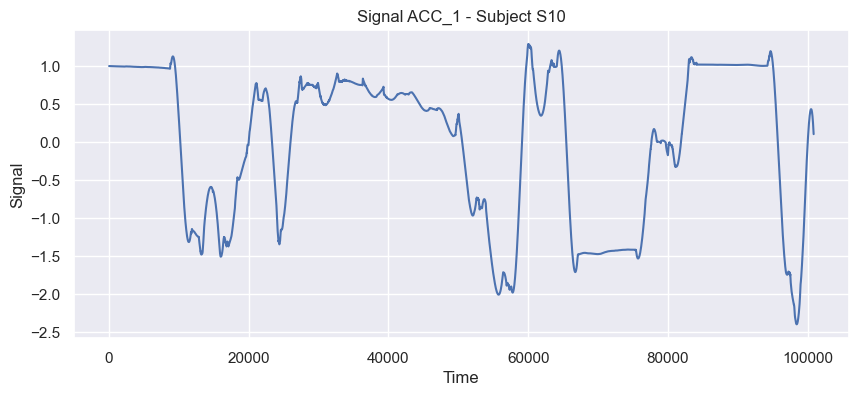

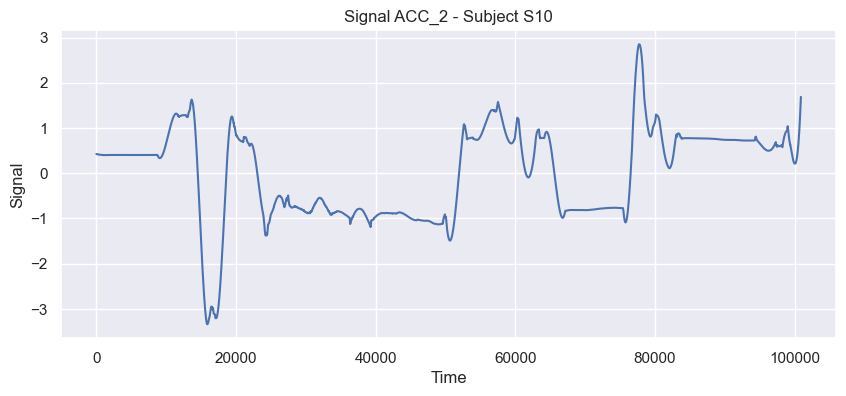

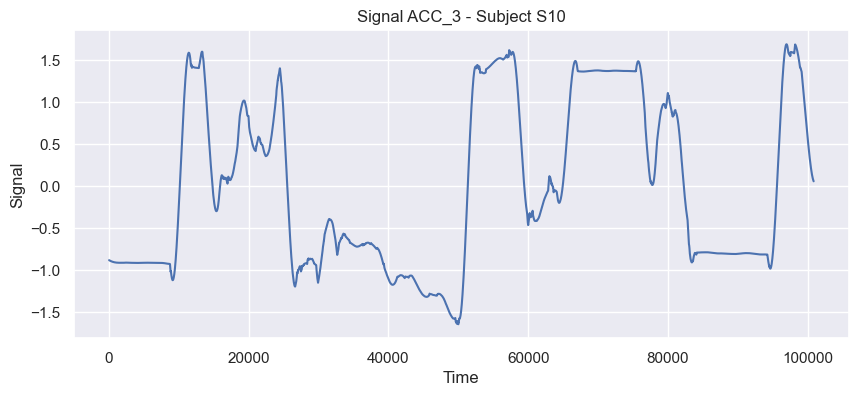

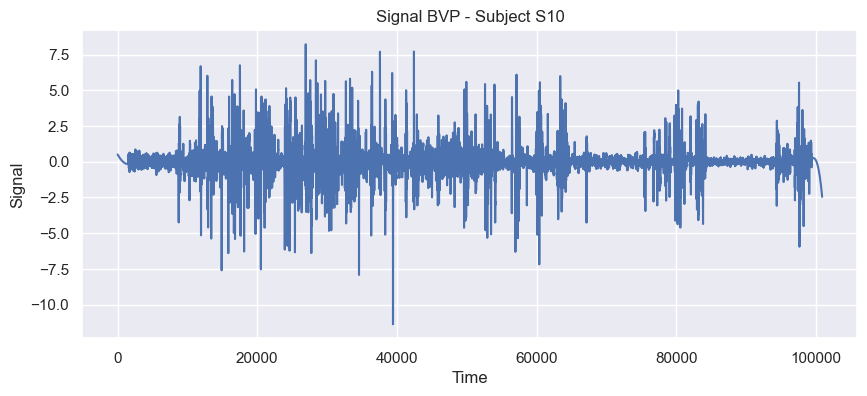

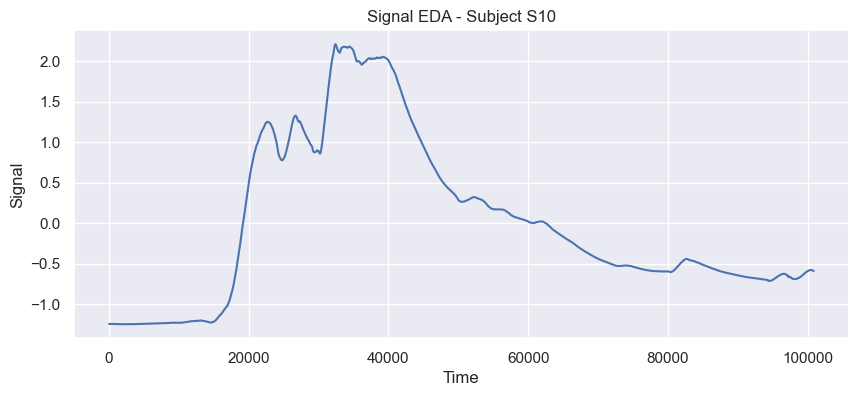

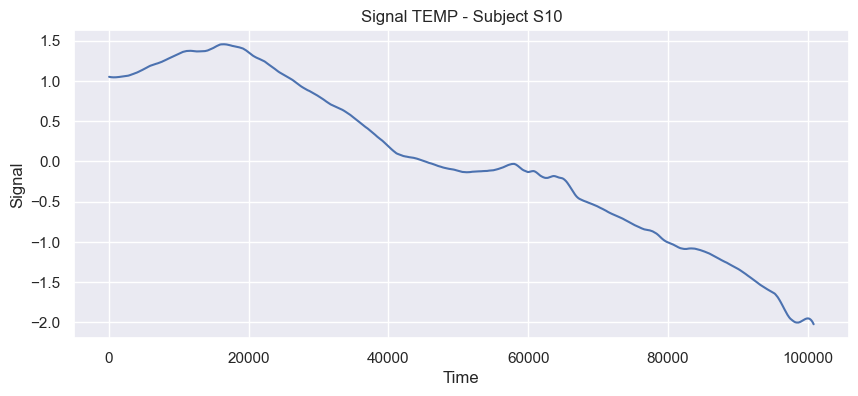

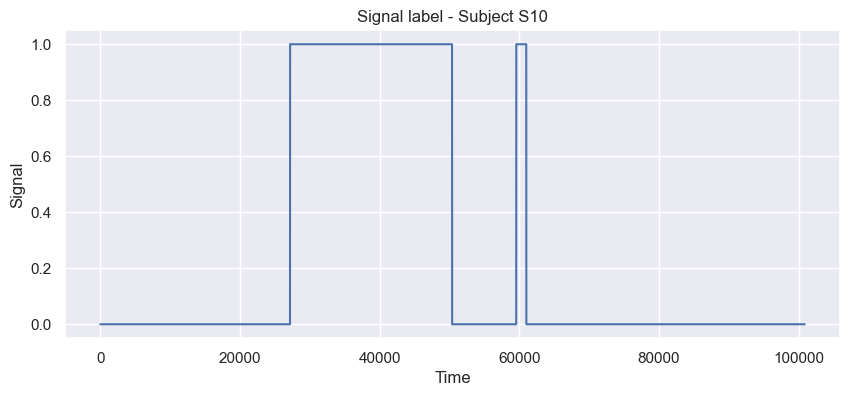

In [6]:
display_subject_trial_signals(wrist_data, 'S10')

### Feature Extraction

In [7]:
get_feature_importance(wrist_data)

,Feature,Importance
3,BVP,263.200000
1,ACC_2,204.400000
0,ACC_1,287.933333
5,TEMP,169.400000
2,ACC_3,231.466667
4,EDA,185.066667


### PCA Analysis

,PC1,PC2,PC3,PC4
0,1.265973,-0.788234,-1.298303,-1.495290
1,1.265719,-0.788155,-1.295284,-1.495578
2,1.265465,-0.788076,-1.292269,-1.495866
3,1.265211,-0.787997,-1.289258,-1.496153
4,1.264957,-0.787918,-1.286252,-1.496440
...,...,...,...,...
1654771,-2.121867,2.807813,-0.659402,0.256624
1654772,-2.122223,2.811949,-0.662536,0.253459
1654773,-2.122578,2.816089,-0.665675,0.250287
1654774,-2.122933,2.820233,-0.668821,0.247109


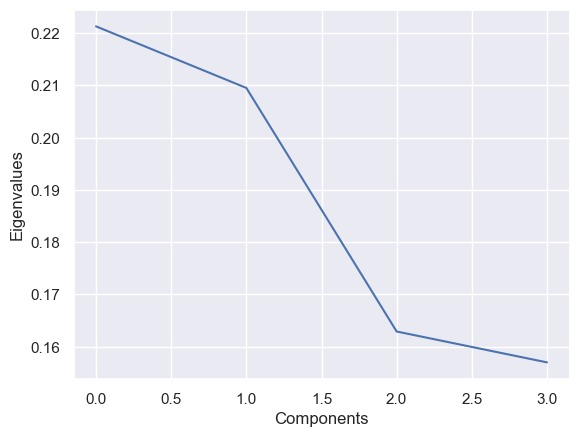

In [8]:
pca_analysis(wrist_data)

### Class Imbalance

In [9]:
def get_all_labels(_data_dict: dict):
  _combined_df = pd.concat([_data_dict[entry] for entry in _data_dict.keys()], axis=0, ignore_index=True)\
  
  return _combined_df['label'].values.ravel()

In [10]:
def get_class_balances(labels: list[int]):
  unique_labels, counts = np.unique(labels, return_counts=True)

  for label, count in zip(unique_labels, counts):
      print(f"Label {label}: {count} ({count / len(labels) * 100:.2f}%)")

In [11]:
def get_class_imbalances_per_subject(_data_dict: dict):
  for entry in _data_dict.keys():
    labels = _data_dict[entry]['label'].values.ravel()

    print(f"Subject {entry}:")
    get_class_balances(labels)

#### Wrist Data

In [12]:
wrist_labels = get_all_labels(wrist_data)
get_class_balances(wrist_labels)

Label 0: 1370507 (82.82%)
Label 1: 284269 (17.18%)


In [13]:
get_class_imbalances_per_subject(wrist_data)

Subject S2:
Label 0: 100016 (83.68%)
Label 1: 19512 (16.32%)
Subject S3:
Label 0: 113349 (85.37%)
Label 1: 19427 (14.63%)
Subject S4:
Label 0: 108806 (83.35%)
Label 1: 21730 (16.65%)
Subject S5:
Label 0: 103208 (82.40%)
Label 1: 22048 (17.60%)
Subject S6:
Label 0: 128872 (85.19%)
Label 1: 22400 (14.81%)
Subject S7:
Label 0: 70728 (76.37%)
Label 1: 21888 (23.63%)
Subject S8:
Label 0: 76840 (76.91%)
Label 1: 23072 (23.09%)
Subject S9:
Label 0: 84600 (91.82%)
Label 1: 7536 (8.18%)
Subject S10:
Label 0: 76232 (75.57%)
Label 1: 24640 (24.43%)
Subject S11:
Label 0: 82988 (89.76%)
Label 1: 9468 (10.24%)
Subject S13:
Label 0: 79400 (77.70%)
Label 1: 22784 (22.30%)
Subject S14:
Label 0: 93242 (90.94%)
Label 1: 9294 (9.06%)
Subject S15:
Label 0: 69608 (74.80%)
Label 1: 23456 (25.20%)
Subject S16:
Label 0: 93203 (88.60%)
Label 1: 11989 (11.40%)
Subject S17:
Label 0: 89415 (78.13%)
Label 1: 25025 (21.87%)
